In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
# from sklearn import cross_validation
%matplotlib inline

df_day=pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/edwisor-india-bucket/projects/data/DataN0103/day.csv")

#Print the `head` of the data
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
#understanding dataset dimensions
df_day.shape

(731, 16)

In [3]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [4]:
##################################################### Univariate Analysis##########################################

# Target variable  analysis
df_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


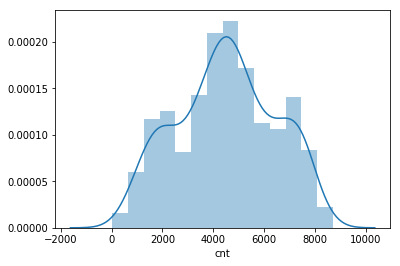

In [5]:
#Check whether target variable is normal or not
sns.distplot(df_day['cnt'])

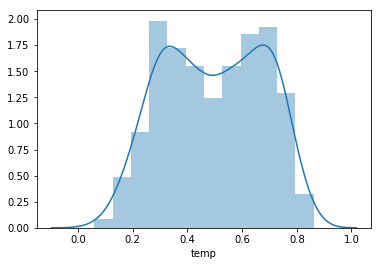

In [6]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df_day['temp']);

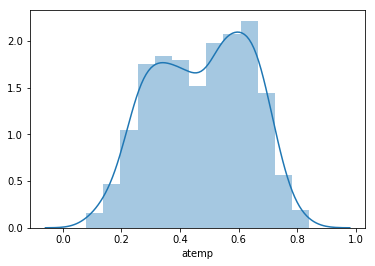

In [7]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(df_day['atemp']);

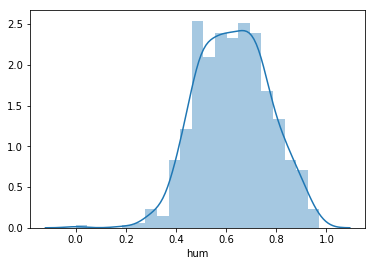

In [8]:
#Check whether  variable 'hum'is normal or not
sns.distplot(df_day['hum']);

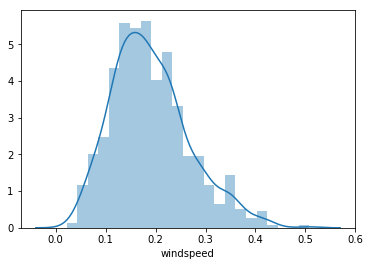

In [9]:
#Check whether  variable 'hum'is normal or not
sns.distplot(df_day['windspeed']);

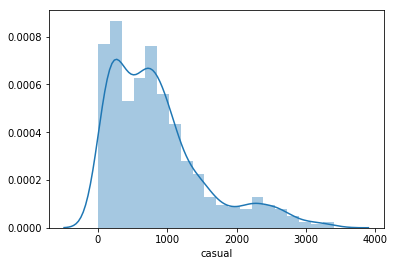

In [10]:
#Check whether  variable 'casual'is normal or not
# it is clearly showing that chances of outliers present in  'casual' varible
sns.distplot(df_day['casual']);

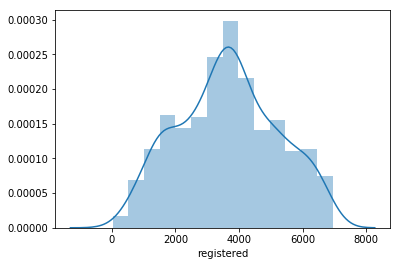

In [11]:
#Check whether  variable 'registered'is normal or not
sns.distplot(df_day['registered']);

In [12]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


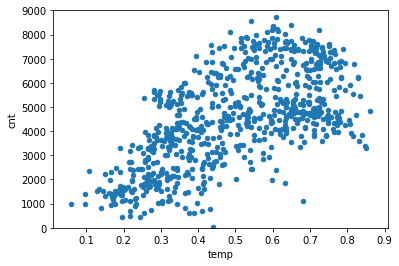

In [13]:
######################################### Bivariate  Analysis #####################################################
  

#relation between Numerical Variable 'temp' and target variable 'cnt'

df_day['temp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'

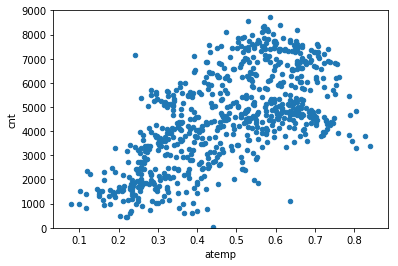

In [14]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'

df_day['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'


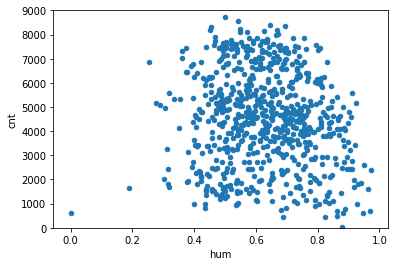

In [15]:
#relationship between Numerical Variable 'hum' and target variable 'cnt'

df_day['hum'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'

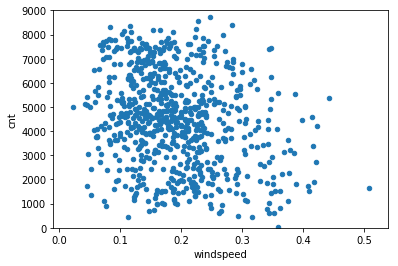

In [16]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'

df_day['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'




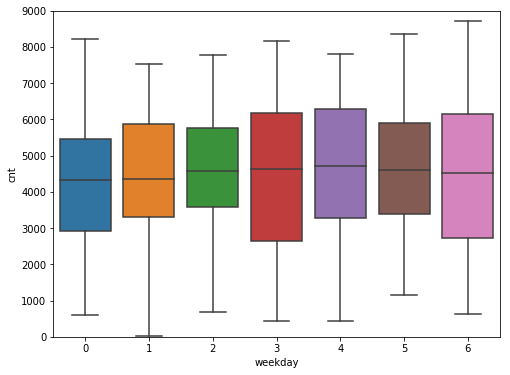

In [17]:

#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that for all the weekdays median in between 4000- 5000  

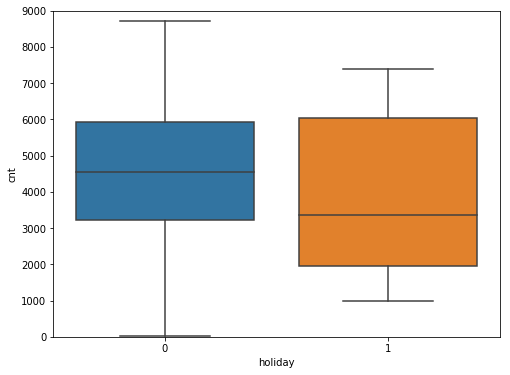

In [18]:

#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that median  high on  holidays when compare to weekdays

In [19]:
##########################################   missing  values ##############################################
#total_missing_values = df_day.isnull().sum().sort_values(ascending=False)
#total_missing_value

total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


In [20]:
#Already all numeric variable  are in normalize form so  , we are not analysing  Outliers   here

#here the  six  numerics variables are present  out of six four variables are in normalize form , 
#  temp,atem,hum,windspread  are in  normalize form  no need to check outliers

#casual and registered  have to check outliers

df_day_1 =  df_day.copy()

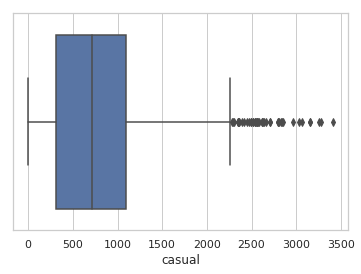

In [21]:
######################################### Outlier Analysis ##########

df_day.head()

#plt.boxplot(df_day_1['casual'])

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day['casual'],orient ='h')

In [22]:
#It seems Outliers are present  in  'Casual' variable  but we are keeping as it is , will detect and  conver outliers  during tuning 
#process

# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
#sns.regplot(x="casual", y="cnt", data=df_day);

df_day['casual'].corr(df_day['cnt'])

0.6728044333386833

-855.25
2266.75


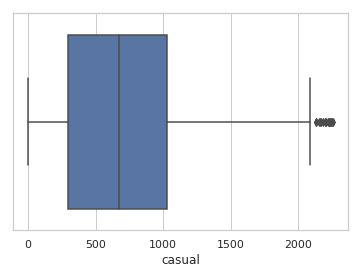

In [23]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

df_day_out = df_day.copy()

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,'casual'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day_out['casual'],orient ='h')


0.6460020508747333

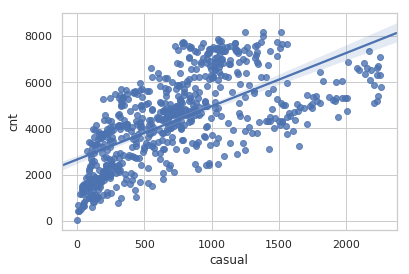

In [24]:
# Correlation between 'casual' and 'cnt'  after  removal of  outliers
sns.regplot(x="casual", y="cnt", data=df_day_out);

df_day_out['casual'].corr(df_day_out['cnt'])

In [25]:
############################################# feature  selection   #######################################
df_day.head()
#Selection of numerical feature  based  on pearson corelation 

day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]
#day_numeric.shape


#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1.0,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1.0,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1.0,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1.0


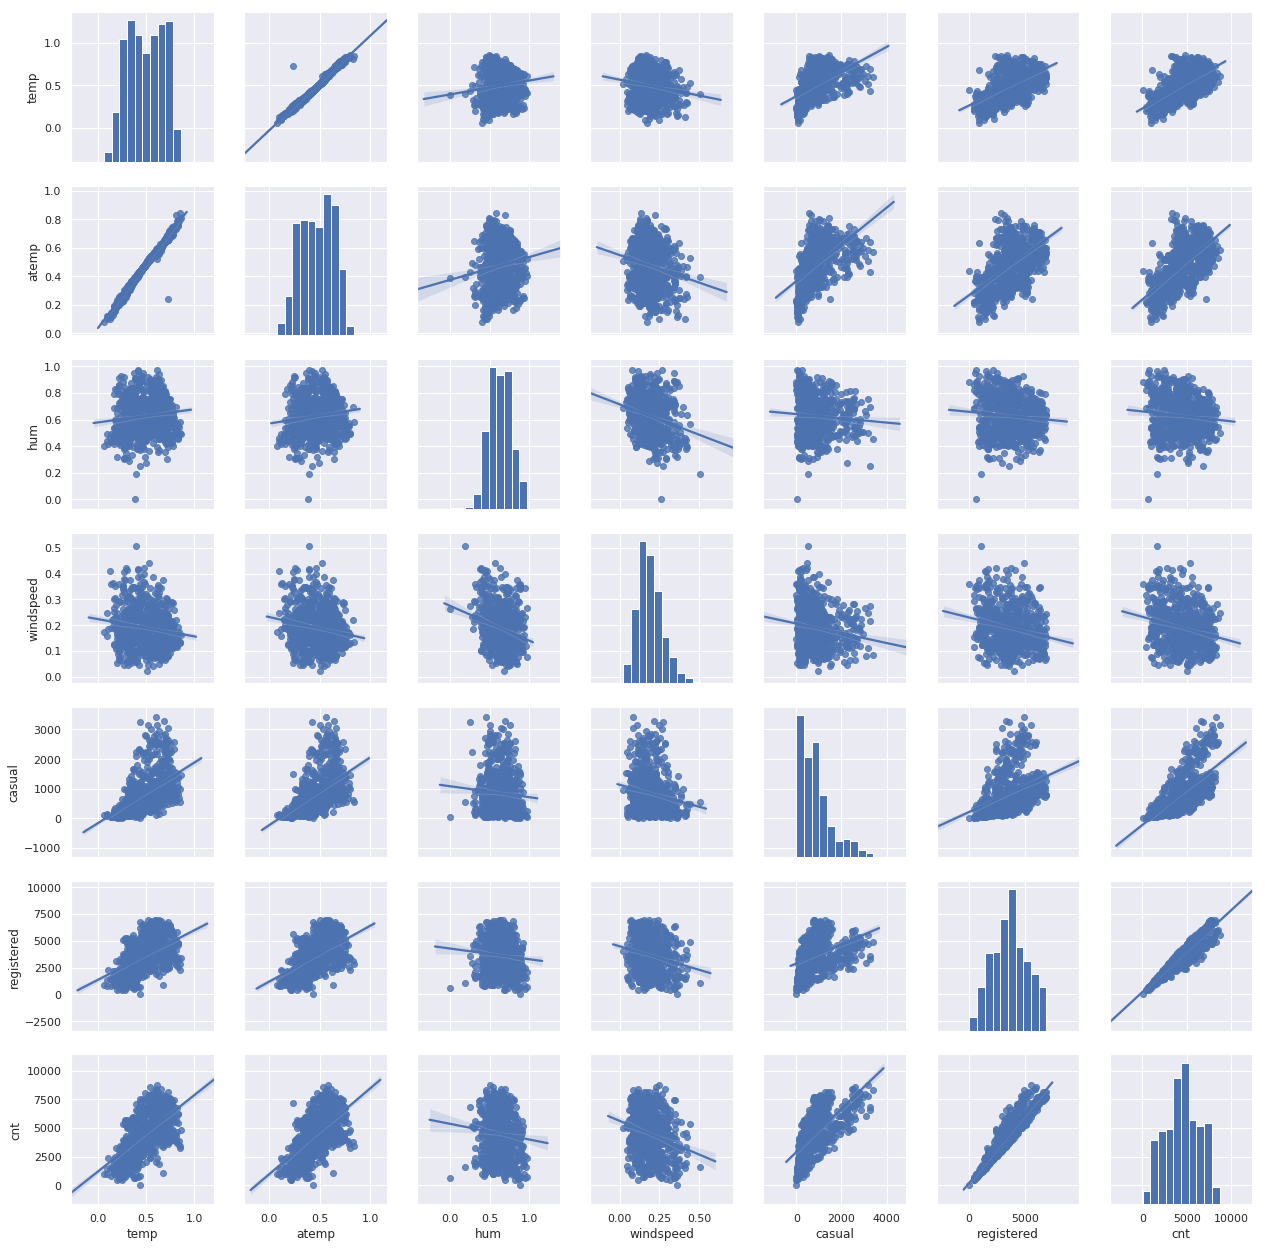

In [26]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], height = 2.5,kind="reg")
plt.show();

In [27]:
#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'temp' and 'atemp'
# There is a   poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()


,temp,windspeed,casual,registered,cnt
0,0.344167,0.160446,331,654,985
1,0.363478,0.248539,131,670,801
2,0.196364,0.248309,120,1229,1349
3,0.200000,0.160296,108,1454,1562
4,0.226957,0.186900,82,1518,1600


In [28]:
numeric_features.shape

(731, 5)

In [29]:
# feature  Scaling
#######################################  Normality  Check ######################################

# cnames = ['casual','registered']

# for i in cnames :
#     print(i)
#     df_day[i] = (df_day[i] - min(df_day[i]))/(max(df_day[i]) - min(df_day[i]))

# df_day.head()

In [30]:
#now iam not checking  categorical feature importance i will check it later during tuning process

#Now  for variable  not doing  Data Scaling  this will do during tuning process
    

In [31]:
#diividing  Test and train data  using skilearn   train_test_split 

df_day_feature_selection = df_day.drop(['atemp','hum'],axis = 1)
df_day_feature_selection.shape

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_day_feature_selection, test_size=0.2)

#train.shape

train.head()
#test.shape
#train.iloc[:,2:13]
#test.head()
#train.iloc[:,13]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.246600,150,836,986
174,175,2011-06-24,3,0,6,0,5,1,1,0.724167,0.222025,969,4022,4991
260,261,2011-09-18,3,0,9,0,0,0,1,0.507500,0.178483,1353,2921,4274
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.417908,208,1705,1913
250,251,2011-09-08,3,0,9,0,4,1,3,0.633913,0.192748,153,1689,1842


In [32]:
#********************************** Decision Tree  Regressor ************************************
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor

train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one
#target_feature

# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [33]:
#Decision tree for regression
#fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# predition   by using predict method

#predictions_DT = my_tree_one.predict(test_feature)

[6530. 2177. 4120. 4758. 4845. 1817.  920. 5107. 6536. 5986.  920. 6207.
 2594. 4586. 1872. 5557. 5976. 1550. 2913. 2429. 3095. 3456. 7736. 1685.
 6830. 4036.  959. 7466. 1011. 4966. 4790. 4639. 4191. 3510. 4708. 5062.
 2177. 4362. 6597. 4258. 6864. 1096. 3641. 3744. 4916. 2808. 5557. 3376.
 1746. 6889. 6457. 4660. 5892. 4563. 7424. 3163. 1977. 6734. 6536. 6118.
 4725. 3846. 3744. 5918. 1167. 1529. 1027. 4339. 6536. 1600. 3811. 6978.
 5686. 6572. 3392. 3542. 4677. 1872. 4067. 1027.  605. 2455. 6830. 3641.
 5323. 7538. 4332. 6734. 5892.  441. 1096. 5058. 7702. 4066. 6664. 3542.
 6786. 1536. 7363. 4191. 4322. 7347. 5202. 7350. 6536. 2077. 4866. 3623.
 2808. 3523. 2417. 3727. 5312. 4758. 4294. 1027. 3641. 4649. 3922. 7442.
 2935. 1461. 2594. 2133. 1985. 5312. 4458. 2423. 7290.  441. 1685. 5459.
 3644. 6917. 4073. 3623. 7570. 4010. 2895. 6457. 4911. 4586. 5180. 5191.
 4991. 3784. 4475.]


In [34]:


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

# Error  is getting  "3.597167961514944"

4.853316113028919

In [35]:

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split =4
my_tree_two = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

MAPE(test_target_feature,predictions_DT_two)

#Now error is getting  '3.689409886025817'

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
[6557.         2155.66666667 4030.         4842.         4760.35
 1843.          972.         5535.83333333 6536.         5857.5
  972.         6320.28571429 2690.28571429 4619.09090909 1954.66666667
 5529.33333333 5976.         1534.33333333 2902.2        2707.
 3105.         3578.44444444 7700.5        1686.375      6836.5
 4009.66666667  993.         7582.          972.         4938.5
 4760.35       4612.         4144.5        3494.5        4709.71428571
 4986.53333333 2155.66666667 4380.71428571 6597.5        4188.27272727
 6866.         1121.         3578.44444444 3744.         4986.53333333
 2827.66666667 5529.33333333 3297.11111111 1686.375      6940.66666667
 6146.         470

4.973464251381667

In [36]:
#RSS - Residual Sum 
#test_target_feature,predictions_DT_two
rss= ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

#RMSE
rmse=np.sqrt(MSE)
print(rmse)

5403419.65620419
36757.95684492646
191.72364706766473


In [37]:
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

#MAPE 
MAPE(test_target_feature,predictions_DT_two)

#MAPE : 3.87

4.973464251381667

In [38]:
#RMSE

RMSE(test_target_feature,predictions_DT_two)

#170.1746206057741

Mean Square :  36757.95684492646
Root Mean Square :  191.72364706766473


191.72364706766473

In [39]:
#************************************ Random Forest ************************************************
#here  same features are taking  what we took for the Decision Tree
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#train_features_one

# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model1 = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)
#rf_exp.fit(train_features, train_labels)

print(RF_model1)
# Predict the model using predict funtion

RF_predict = RF_model1.predict(test_feature)

print(RF_predict)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)
[6359.974 2391.11  4086.84  4466.368 4845.674 2041.454  659.968 5647.66
 5921.264 5778.82   831.264 6334.312 2806.798 4557.018 1847.062 5570.05
 6249.398 1536.652 2978.464 2976.29  3219.828 3337.27  7800.778 1658.72
 6705.318 4199.594 1025.15  7530.548  629.762 4879.054 4843.662 4601.364
 4285.672 3488.516 4635.434 5040.378 2178.948 4384.984 6625.116 4355.404
 6813.05  1217.126 3689.332 3194.538 4858.908 2784.786 5572.356 3270.204
 1676.972 7011.172 6195.25  4589.822 6000.58  4547.116 7315.174 3208.188
 1953.648 8059.296 6035.238 6268.84  4710.49  3919.468 3304.58  6055.634
 1233.428 1551.892  998.46  4150.

In [40]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict)

#Error rate is 1.75

#Here it is stating accuracy of the model increases

2.303713019476554

In [41]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict)

#RMSE =  79.51

Mean Square :  12606.814948925166
Root Mean Square :  112.28007369486879


112.28007369486879

In [42]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn


mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression feature ordering
mir_result
#feature_scores = []
#for i in np.arange(len(train)):
#    feature_scores.append([train_variables_one_1[i],mir_result[i]])
#sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
#print(np.array(sorted_scores))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([0.20760697, 0.25259759, 0.36279814, 0.        , 0.02766936,
       0.05040088, 0.37330617, 0.02576223, 0.60420677, 1.65221245])

In [43]:
#tuning  Random FOrest Model

importances = list(RF_model1.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(pair)) for pair in feature_importances]


[0.0002523805013645738, 0.0004979000570309046, 0.0005628192710783104, 4.5049582457373736e-05, 0.0007504670818226986, 0.0001656822447581268, 0.0012570877938291834, 0.0008734680112200118, 0.09194999273353864, 0.9036451527229002]


In [44]:
train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

season = 0.20760697465491518
yr = 0.2525975859271494
mnth = 0.3627981442393704
holiday = 0.0
weekday = 0.027669363494542853
weathersit = 0.05040087766568413
temp = 0.3733061718774464
windspeed = 0.02576222905402803
casual = 0.6042067683356622
registered = 1.6522124482099496


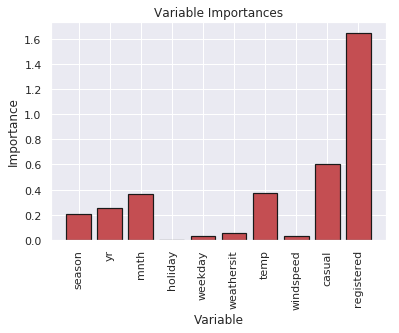

In [45]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [46]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we 
#wil check our model accuracy  by reducing features
train_feature_two = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
# build random forest model

Rf_model2 = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)
#rf_exp.fit(train_features, train_labels)

print(Rf_model2)
# Predict the model using predict funtion

RF_predict_two= Rf_model2.predict(test_feature_two)

print(RF_predict_two)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)
[6357.998 2373.728 4097.228 4499.234 4850.456 2041.53   671.47  5634.21
 5842.152 5747.784  803.228 6376.3   2784.318 4556.042 1838.47  5568.846
 6269.966 1536.33  2969.614 2972.14  3216.266 3335.84  7791.508 1655.112
 6696.86  4222.834 1005.954 7505.068  706.044 4904.882 4836.264 4616.296
 4269.366 3484.134 4636.964 5045.91  2183.164 4384.086 6623.084 4353.44
 6804.44  1212.966 3689.966 3236.46  4852.336 2770.19  5567.056 3249.648
 1676.126 7027.05  6183.47  4587.288 5943.822 4548.264 7313.436 3203.812
 1971.988 8078.114 6008.196 6271.732 4710.778 3930.93  3318.05  6048.72
 1212.696 1553.874 1009.862 4155.

In [47]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

#Error rate is 1.7174437877815665

#Here it is stating accuracy of the model increases slightly

2.2075319363041546

In [48]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_two)

#RMSE =  126.06197301780921


# Accuracy and  RMSE is improved  

Mean Square :  12227.290902884351
Root Mean Square :  110.57708127312979


110.57708127312979

In [49]:
############################################# Linear Regression ############################
#here  same features are taking  what we took for the Linear Regression
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#test_target_feature

#import  linear regreesion  

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.687e+32
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        02:09:19   Log-Likelihood:                 14825.
No. Observations:                 584   AIC:                        -2.963e+04
Df Residuals:                     574   BIC:                        -2.959e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.16e-12   1.71e-13    -12.615      0.000    -2.5e-12   -1.82e-12
x2          2.274e-13   2.97e-13      0.765      0.445   -3.56e-13    8.11e-13
x3          2.416e-13   5.01e-14      4.821      0.000    1.43e-13     3.4e-13
x4          2.387e-12    6.4e-13      3.729      0.000    1.13e-12    3.64e-12
x5          1.776e-14   4.81e-14      0.370      0.712   -7.66e-14    1.12e-13
x6          6.821e-13   1.69e-13      4.037      0.000     3.5e-13    1.01e-12
x7         -6.821e-13   7.86e-13     -0.867      0.386   -2.23e-12    8.63e-13
x8          1.137e-13   1.06e-12      0.107      0.915   -1.97e-12     2.2e-12
x9             1.0000   1.87e-16   5.35e+15      0.000       1.000       1.000
x10            1.0000   1.18e-16   8.49e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.671   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.248
Skew:                          -0.028   Prob(JB):                        0.325
Kurtosis:                       2.701   Cond. No.                     4.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#predict the  model

predict_LR = linear_regression_model.predict(test_feature)

print(predict_LR)

[6312. 2368. 4127. 4788. 4835. 1996.  506. 5629. 5923. 5668. 1013. 6269.
 2660. 4541. 1796. 5611. 6460. 1543. 2933. 3071. 3126. 3194. 7639. 1607.
 6691. 4318.  981. 7534.  627. 4881. 4833. 4579. 4302. 3423. 4629. 4972.
 2162. 4390. 6685. 4338. 6778. 1204. 3747. 3351. 4862. 2743. 5566. 3214.
 1683. 7333. 6230. 4553. 6041. 4548. 7264. 3005. 1951. 8227. 6591. 6304.
 4687. 3915. 3351. 6073. 1162. 1530. 1115. 4270. 6857. 1650. 3740. 6891.
 5633. 6436. 3403. 3368. 4634. 1944. 3372. 1005.  795. 2485. 6770. 3659.
 5260. 7591. 4182. 7907. 6140.  683. 1248. 5099. 7965. 4549. 6290. 3053.
 6825. 1471. 7421. 4381. 4509. 7582. 5305. 7765. 6639. 2077. 4905. 3613.
 2744. 3620. 2471. 3709. 5302. 5169. 4150. 1000. 3907. 4940. 3959. 7375.
 3204. 1360. 2566. 2056. 1977. 5217. 4326. 2424. 7273.  431. 1605. 5463.
 3544. 7105. 3974. 3577. 7720. 3958. 2792. 6233. 4906. 4576. 5260. 5336.
 5130. 3761. 3910.]


In [51]:
#evaluate model using MAPE

MAPE(test_target_feature,predict_LR)
#MAPE  is  0.108

5.684642826521053e-14

In [52]:
#Predict the model using  RMSE

RMSE(test_target_feature,predict_LR)

#RMSE  is  '3.9'

#it is  showing that  Linear Regression model is  best suitable for the dataset
# Conclusion  Linear regression is the  best model for the dataset

Mean Square :  5.024322120964763e-24
Root Mean Square :  2.241499971216766e-12


2.241499971216766e-12